<img
src="http://www.imt-atlantique.fr/sites/default/files/logo_mt_0_0.png"
WIDTH=180 HEIGHT=180>

<CENTER>

<p><font size="5"> Cursus Recherche : Module Analogie </font></p>
<p><font size="5"> Representation Learning </font></p>
</br>
<p><font size="4"> [<span style="color:blue">Institut Mines Télécom</span>](https://www.mines-telecom.fr/en/)</p>

</CENTER>

----------------------------

Objectifs :
- Implémenter le pipeline : PCA + kmeans 
Varier le nombre de composantes 
tests sur Digits 

--> Notebook "propre", annoté et commenté pour le Mardi 14 Novembre. 

Méthodes : 

Deux domaines , trois datasets : 
 - Digits 
 - Olivetti Faces 
 - Haxby (données fMRI) 

Deux méthodes de Dimensionality Reduction 
Deux méthodes de Clustering 

Résultats : 

figures 


# <span style="color:##00B8DE"> Pipeline : from reduction to clustering</span>

**1)** With OliFaces


**2)** With Digits


**3)** With Haxby

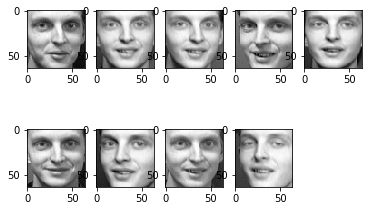

Clustering performance evaluation for PCA/Kmeans on OliFaces : 
44.5 %


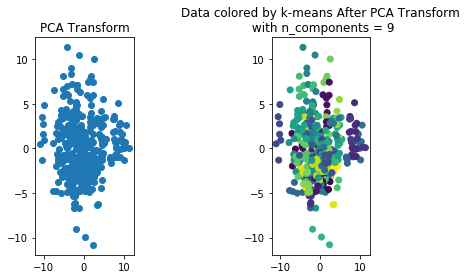

C:\Programs\Miniconda3\envs\DeepLearningPython\lib\site-packages\sklearn\decomposition\fastica_.py:118: UserWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '


Clustering performance evaluation for ICA/Kmeans on OliFaces : 
48.74 %


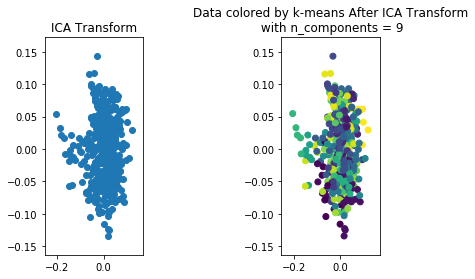

Text(0.5,1,'Clustering performance evaluation for PCA/kmeans on OliFaces, in function of n_components')

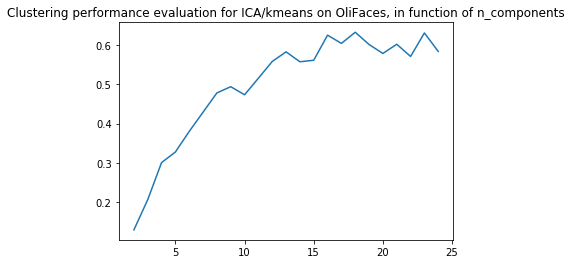

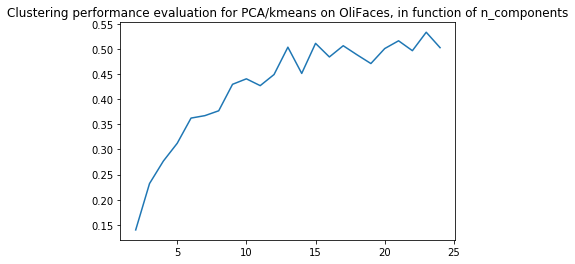

In [1]:
# We will Test PCA/ICA then KMeans Transform on OliFaces

%matplotlib inline

import sklearn.datasets as skld
from sklearn.cluster import KMeans
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn import metrics

#ICA
from sklearn.decomposition import FastICA
#PCA
from sklearn.decomposition import PCA

#We generate our samples
OliFaces = skld.fetch_olivetti_faces()
Target = np.array(OliFaces.target)

#Printing samples of the dataset of OliFaces
r = random.randint(0,39)
plt.subplot(251)
plt.imshow(OliFaces.images[10*r],cmap=plt.cm.gray)
plt.subplot(252)
plt.imshow(OliFaces.images[10*r+1],cmap=plt.cm.gray)
plt.subplot(253)
plt.imshow(OliFaces.images[10*r+2],cmap=plt.cm.gray)
plt.subplot(254)
plt.imshow(OliFaces.images[10*r+3],cmap=plt.cm.gray)
plt.subplot(255)
plt.imshow(OliFaces.images[10*r+4],cmap=plt.cm.gray)
plt.subplot(256)
plt.imshow(OliFaces.images[10*r+5],cmap=plt.cm.gray)
plt.subplot(257)
plt.imshow(OliFaces.images[10*r+6],cmap=plt.cm.gray)
plt.subplot(258)
plt.imshow(OliFaces.images[10*r+7],cmap=plt.cm.gray)
plt.subplot(259)
plt.imshow(OliFaces.images[10*r+8],cmap=plt.cm.gray)
plt.show()



def OliFaces_PCA_kmeans(n,interrupteur):
    # We create an object from the PCA class
    pca = PCA(n_components=n, copy=True, whiten=False, svd_solver='auto', tol=0.0, iterated_power='auto', random_state=None)
    ImageOliPCA = pca.fit_transform(OliFaces.images.reshape(400,64*64))#This transformation is a compression of data
    
    #Clusterization:
    nbClust = 50
    
    kmeans = KMeans(n_clusters=nbClust, init='k-means++', n_init=10, max_iter=300, tol=0.0001, precompute_distances='auto',
       verbose=0, random_state=None, copy_x=True, n_jobs=1, algorithm='auto').fit(ImageOliPCA)
    labelsPCA = kmeans.labels_#.labels_ donne le numéro du cluster dans lequel se trouve chaque blob

    global perf
    
    if interrupteur :
        perf = metrics.adjusted_rand_score(Target,labelsPCA)
    
    else :
        print("Clustering performance evaluation for PCA/Kmeans on OliFaces : ")
        print((10000*metrics.adjusted_rand_score(Target, labelsPCA)//1)/100,'%')

        plt.subplot(131)
        plt.title("PCA Transform")
        plt.scatter(ImageOliPCA[:,0],ImageOliPCA[:,1])
        plt.subplot(133)
        plt.title("Data colored by k-means After PCA Transform\n with n_components = %i" % n)
        plt.scatter(ImageOliPCA[:,0],ImageOliPCA[:,1],c=labelsPCA)

        plt.show()
    

def OliFaces_ICA_kmeans(n,interrupteur):
    # We will Test ICA Transform on OliFaces
    # We create an object from the ICA class
    ica = FastICA(n_components=n, algorithm='parallel', whiten=True, fun='logcosh', fun_args=None, max_iter=200, tol=0.0001, w_init=None, random_state=None)
    ImageOliICA = ica.fit_transform(OliFaces.images.reshape(400,64*64))#This transformation is a compression of data
    


    #Clusterization ICA:
    nbClust = 50

    kmeans = KMeans(n_clusters=nbClust, init='k-means++', n_init=10, max_iter=300, tol=0.0001, precompute_distances='auto',
       verbose=0, random_state=None, copy_x=True, n_jobs=1, algorithm='auto').fit(ImageOliICA)
    labelsICA = kmeans.labels_#.labels_ donne le numéro du cluster dans lequel se trouve chaque blob

    global perf
    
    if interrupteur :
        perf = metrics.adjusted_rand_score(Target,labelsICA)
    
    else :
        print("Clustering performance evaluation for ICA/Kmeans on OliFaces : ")
        print((10000*metrics.adjusted_rand_score(Target, labelsICA)//1)/100,'%')

        plt.subplot(131)
        plt.title("ICA Transform")
        plt.scatter(ImageOliICA[:,0],ImageOliICA[:,1])
        plt.subplot(133)
        plt.title("Data colored by k-means After ICA Transform\n with n_components = %i" % n)
        plt.scatter(ImageOliICA[:,0],ImageOliICA[:,1],c=labelsICA)

        plt.show()
        
n = random.randint(5,12)
OliFaces_PCA_kmeans(n,False)
OliFaces_ICA_kmeans(n,False)

N = 25
Perf = []
indX = [i for i in range(2,N)]
for n in range(2,N):
    OliFaces_ICA_kmeans(n,True)
    Perf.append(perf)

plt.figure()
plt.plot(indX, Perf)
plt.title("Clustering performance evaluation for ICA/kmeans on OliFaces, in function of n_components")

M = 25
Perfo = []
indx = [i for i in range(2,M)]
for n in range(2,M):
    OliFaces_PCA_kmeans(n,True)
    Perfo.append(perf)

plt.figure()
plt.plot(indx, Perfo)
plt.title("Clustering performance evaluation for PCA/kmeans on OliFaces, in function of n_components")


Les courbes d'évaluation de performance de clustering pour PCA et ICA sont globalement croissantes en fonction du nombre de n_component, mais divergent assez rapidement (i.e. Elles perdent en régularité).
On s'aperçit aussi qu'en augmentant le nombre de clusters que le kmeans cherche, on a tendance à "lisser" les courbes de PCA/kmeans et d'ICA/kmeans.

(400, 10)
Clustering performance evaluation for PCA/kmeans on Olifaces: 
0.0


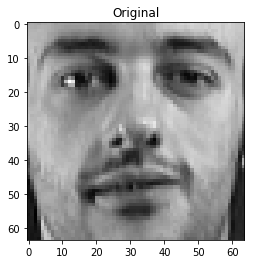

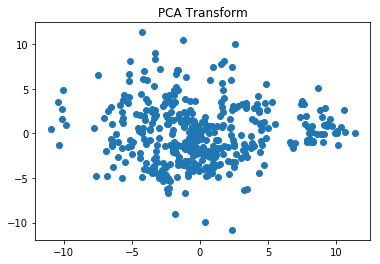

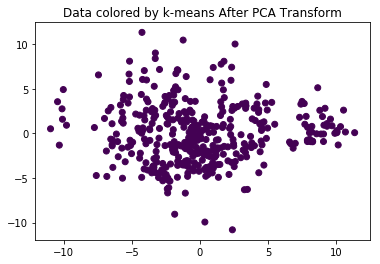

In [2]:
# We will Test PCA/ICA then MeanShift Transform on OliFaces $
# DEADDDDD Attribute : labels_ doesnt exist ?!

%matplotlib inline

import sklearn.datasets as skld
from sklearn.cluster import MeanShift
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics, cluster

#ICA
from sklearn.decomposition import PCA

#We generate our samples
OliFaces = skld.fetch_olivetti_faces()
Target = np.array(OliFaces.target)

# We create an object from the PCA class
pca = PCA(n_components=10, copy=True, whiten=False, svd_solver='auto', tol=0.0, iterated_power='auto', random_state=None)

ImageOliPCA = pca.fit_transform(OliFaces.images.reshape(400,64*64))#This transformation is a compression of data
print(np.shape(ImageOliPCA))

plt.figure()
plt.title("Original")
plt.imshow(OliFaces.images[150], cmap=plt.cm.gray)

plt.figure()
plt.title("PCA Transform")
plt.scatter(ImageOliPCA[:,0],ImageOliPCA[:,1])

#Cluster : Bandwith with MeanShift
bandwidth = cluster.estimate_bandwidth(ImageOliPCA)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True).fit(ImageOliPCA)

labelsPCA = ms.labels_#.labels_ donne le numéro du cluster dans lequel se trouve chaque blob


plt.figure()
plt.title("Data colored by k-means After PCA Transform")
plt.scatter(ImageOliPCA[:,0],ImageOliPCA[:,1],c=labelsPCA)

print("Clustering performance evaluation for PCA/kmeans on Olifaces: ")
print(metrics.adjusted_rand_score(Target, labelsPCA))


**2)** With Digits

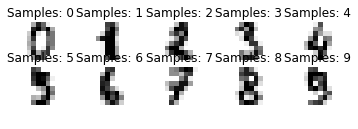

Clustering performance evaluation for PCA/Kmeans on Digits : 
61.23 %


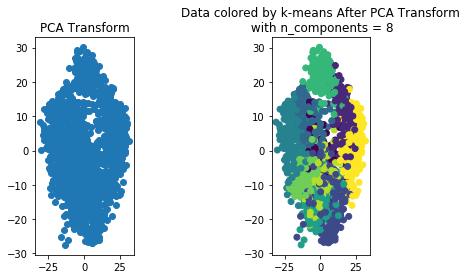

Clustering performance evaluation for ICA/kmeans on Digits: 
58.59 %


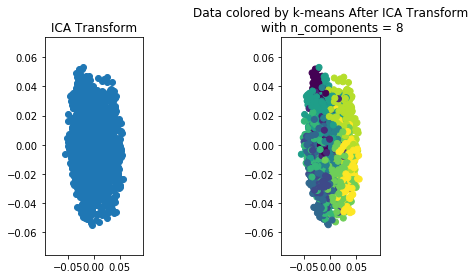

C:\Programs\Miniconda3\envs\DeepLearningPython\lib\site-packages\sklearn\decomposition\fastica_.py:118: UserWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '


Text(0.5,1,'Clustering performance evaluation for PCA/kmeans on Digits, in function of n_components')

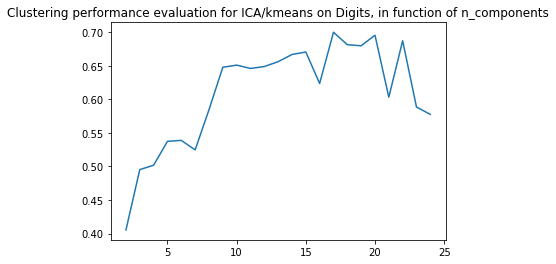

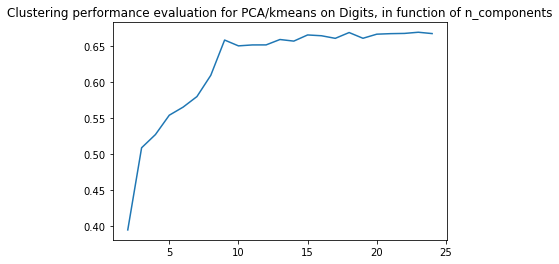

In [2]:
# We will Test PCA Transform on Digits

%matplotlib inline

from sklearn.cluster import KMeans
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import metrics

from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA

# The digits dataset
digits = datasets.load_digits()
images_and_labels = list(zip(digits.images, digits.target))
plt.figure()
for index, (image, label) in enumerate(images_and_labels[:10]):
    plt.subplot(5, 5, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Samples: %i' % label)
plt.show()

#PCA
def Digits_PCA_kmeans(n,interrupteur):
    pca = PCA(n_components=n, copy=True, whiten=False, svd_solver='auto', tol=0.0, iterated_power='auto', random_state=None)
    ImageDigitsPCA = pca.fit_transform(digits.images.reshape(1797,8*8))#This transformation is a compression of data

    #ClusterisationPCA:
    nbClust = 10
    kmeans = KMeans(n_clusters=nbClust, init='k-means++', n_init=10, max_iter=300, tol=0.0001, precompute_distances='auto',
        verbose=0, random_state=None, copy_x=True, n_jobs=1, algorithm='auto').fit(ImageDigitsPCA)
    labelsPCA = kmeans.labels_#.labels_ donne le numéro du cluster dans lequel se trouve chaque blob
    
    global perf
    
    if interrupteur :
        perf = metrics.adjusted_rand_score(digits.target,labelsPCA)
    
    else :
        print("Clustering performance evaluation for PCA/Kmeans on Digits : ")
        print((10000*metrics.adjusted_rand_score(digits.target, labelsPCA)//1)/100,'%')

        plt.subplot(131)
        plt.title("PCA Transform")
        plt.scatter(ImageDigitsPCA[:,0],ImageDigitsPCA[:,1])
        plt.subplot(133)
        plt.title("Data colored by k-means After PCA Transform\n with n_components = %i" % n)
        plt.scatter(ImageDigitsPCA[:,0],ImageDigitsPCA[:,1],c=labelsPCA)

        plt.show()


#ICA
def Digits_ICA_kmeans(n, interrupteur):
    ica = FastICA(n_components=n, algorithm='parallel', whiten=True, fun='logcosh', fun_args=None, max_iter=200, tol=0.0001, w_init=None, random_state=None)
    ImageDigitsICA = ica.fit_transform(digits.images.reshape(1797,8*8))#This transformation is a compression of data
    
    #Clusterization ICA:
    nbClust = 10
    kmeans = KMeans(n_clusters=nbClust, init='k-means++', n_init=10, max_iter=300, tol=0.0001, precompute_distances='auto',
       verbose=0, random_state=None, copy_x=True, n_jobs=1, algorithm='auto').fit(ImageDigitsICA)
    labelsICA = kmeans.labels_#.labels_ donne le numéro du cluster dans lequel se trouve chaque blob
    
    global perf
        
    if interrupteur :
        perf = metrics.adjusted_rand_score(digits.target,labelsICA)
        
    else :
        print("Clustering performance evaluation for ICA/kmeans on Digits: ")
        print((10000*metrics.adjusted_rand_score(digits.target, labelsICA)//1)/100,'%')
    
    
        plt.subplot(131)
        plt.title("ICA Transform")
        plt.scatter(ImageDigitsICA[:,0],ImageDigitsICA[:,1])
        plt.subplot(133)
        plt.title("Data colored by k-means After ICA Transform\n with n_components = %i" % n)
        plt.scatter(ImageDigitsICA[:,0],ImageDigitsICA[:,1],c=labelsICA)
    
        plt.show()


n = random.randint(2,19)
Digits_PCA_kmeans(n,False)
Digits_ICA_kmeans(n,False)

N = 25
Perf = []
indX = [i for i in range(2,N)]
for n in range(2,N):
    Digits_ICA_kmeans(n,True)
    Perf.append(perf)

plt.figure()
plt.plot(indX, Perf)
plt.title("Clustering performance evaluation for ICA/kmeans on Digits, in function of n_components")

M = 25
Perfo = []
indx = [i for i in range(2,M)]
for n in range(2,M):
    Digits_PCA_kmeans(n,True)
    Perfo.append(perf)

plt.figure()
plt.plot(indx, Perfo)
plt.title("Clustering performance evaluation for PCA/kmeans on Digits, in function of n_components")


La performance du clustering sur les Digits avec Pca/kmeans est croissante et plafonne à environ 66%, dès n_component = 14.
La performance du clustering sur les Digits avec Ica/kmeans est globalement croissante jusqu'à n_component = 20, où elle plafonne à 70%, et puis la méthode diverge !

**3)** With Haxby

In [ ]:
# import Data Set !
from nilearn import datasets
import numpy as np
# By default 2nd subject from haxby datasets will be fetched.
haxby_dataset = datasets.fetch_haxby()

# Print basic information on the dataset
print('Mask nifti images are located at: %s' % haxby_dataset.mask)
print('Functional nifti images are located at: %s' % haxby_dataset.func[0])

func_filename = haxby_dataset.func[0]
mask_filename = haxby_dataset.mask

# Load the behavioral data that we will predict
labels = np.recfromcsv(haxby_dataset.session_target[0], delimiter=" ")
y = labels['labels']
session = labels['chunks']

# Remove the rest condition, it is not very interesting
non_rest = y != b'rest'
y = y[non_rest]

# Get the labels of the numerical conditions represented by the vector y
unique_conditions, order = np.unique(y, return_index=True)
# Sort the conditions by the order of appearance
unique_conditions = unique_conditions[np.argsort(order)]

#Pour pca ica, faire des tests de nbres de components de 1 à 10(boucle for), qui donne % de réussite (plus c'est proche de 1, mieux c'est) et 3 images. 

In [ ]:
from nilearn.input_data import NiftiMasker
# For decoding, standardizing is often very important
nifti_masker = NiftiMasker(mask_img=mask_filename, standardize=True,
                           sessions=session, smoothing_fwhm=4,
                           memory="nilearn_cache", memory_level=1)
X = nifti_masker.fit_transform(func_filename)

# Remove the "rest" condition
X = X[non_rest]
session = session[non_rest]